# Conexión con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install neptune-client
! pip install neptune-tensorflow-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
nt already satisfied: gitdb<5,>=4.0.1 in /usr/local/lib/python3.7/dist-packages (from GitPython>=2.0.8->neptune-client) (4.0.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 97 kB 9.1 MB/s 
     |████████████████████████████████| 97 kB 8.9 MB/s 
  Created wheel for neptune-tensorflow-keras: filename=neptune_tensorflow_keras-1.1.0-py3-none-any.whl size=10916 sha256=476f9ec5c16af1167bfde6c906d4b4fd5d13e1237c3eea59c45314ca9354b700
  Stored in directory: /root/.cache/pip/wheels/ce/0e/dc/a44ae47d486c26d3ed9a738f2c7268cb0e72bf9b424d39bc45
Successfully built neptune-tens

# Importe de librerías

In [ ]:
!pip3 install keras-visualizer
from keras_visualizer import visualizer 

from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from datetime import datetime
from google.colab import files
from matplotlib import pyplot
from matplotlib.pyplot import figure
from keras_preprocessing.sequence import pad_sequences







from keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.layers import concatenate


# import neptune.new as neptune
import neptune


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Lectura de datos

In [ ]:
true = pd.read_csv("/content/drive/MyDrive/TFM/Datos/True.csv")
false = pd.read_csv("/content/drive/MyDrive/TFM/Datos/Fake.csv")

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Creación del dataset

Para nuestro proyecto tendremos que crear nuestro dataset a partir de los dos que ya tenemos 

In [ ]:
# Añadimos nuevas categorias a los dataset ya que uniremos ambos datasets y 
# necesitamos saber que noticias son falsas y cuales reales

true['category'] = 1
false['category'] = 0

noticias = pd.concat([true,false]) #Unimos los dos datasets
noticias

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


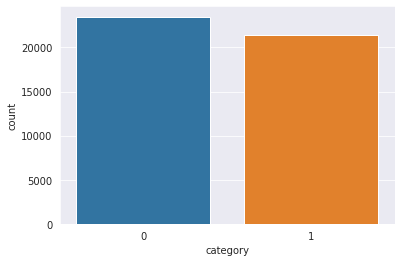

In [ ]:
sns.set_style("darkgrid")
sns.countplot(noticias.category)

Podemos apreciar que hay, aproximadamente, el mismo número de noticias falsas/verdaderas

In [ ]:
# Buscamos valores Nan, podemos ver que todos los registros contienen información, 
# aunque esta puede que no sea correcta, como veremos más adelante
noticias.isna().sum() 

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
#Número total de noticias
noticias.text.count() 

44898

In [ ]:
#Número de noticias por categoría
noticias.subject.value_counts() 

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Análisis de los datos 

## Estudio con las fechas

Las noticias que leemos día a día influyen en como percibimos el mundo, y podría resultar revelador el hecho de estudiar, ante eventos politicos relevantes, el número de noticias publicadas para influenciar la opinión del público.

In [ ]:
# Debemos de tratar la columna de fechas pasando de String a tipo Date con un formato que sea ordenable
true['date']   = true['date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y ').date().strftime('%d/%m/%Y'))
true   = true.sort_values('date', ascending=False)
true['date'] = pd.to_datetime(true['date'],format = '%d/%m/%Y')

# Añadimos una nueva columna para que cuando hagamos group by 
true['Contador'] = 1
true.head()

,title,text,subject,date,category,Contador
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,1
16021,"Turkey, Iran agree to discuss Russia's Syrian ...",ASTANA (Reuters) - Turkey and Iran have agreed...,worldnews,2017-10-31,1,1
16008,Brexit minister says 'basic' EU deal likely ev...,LONDON (Reuters) - Brexit minister David Davis...,worldnews,2017-10-31,1,1
16009,Those who boycott Syrian congress may be sidel...,ASTANA (Reuters) - Syrian groups who choose to...,worldnews,2017-10-31,1,1


In [ ]:
#Agrupamos las noticias por mes y contamos cuantas hay por mes
auxTrue = true.groupby(pd.Grouper(key='date', freq='M')).sum()
auxTrue.reset_index(inplace=True)
auxTrue = auxTrue.rename(columns = {'index':'new column name'})


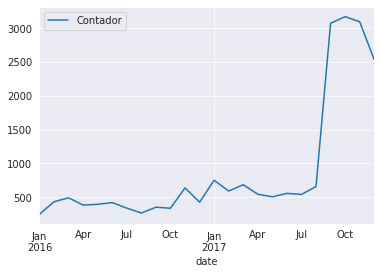

In [ ]:
auxTrue.plot(x='date', y='Contador')



Si observamos la gráfica podemos ver tres puntos de interés, Noviembre de 2016, Enero de 2017 y Junio de 2017. Estás fechas no son baladí, ya que son, respectivamente, el mes de las elecciones Americanas que gana Donal Trump, el mes de la investidura de Donal Trump y el mes en el que comienza a fraguarse el proceso de destitución, conocido en US como Impeachment March (no confundir en este contexto March con Marzo)

In [ ]:
# Realizamos el mismo proceso con las noticias que han sido clasificadas como falsas

# Hay algunas noticias que en su campo de fechas hay datos erroneos, por lo que eliminamos de este pequeño análisis esas noticias
false['date'] = false['date'].apply(lambda x: pd.to_datetime(x).date().strftime('%d/%m/%Y') if (len(x)<15) else  None )
false = false.sort_values('date', ascending=False)
 

In [ ]:
false['date'] = pd.to_datetime(false['date'],format = '%d/%m/%Y')
false = false.dropna()
false['Contador'] = 1
false


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,text,subject,date,category,Contador
9088,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,2017-12-31,0,1
9087,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,politics,2017-12-31,0,1
9086,COORDINATED? Yet Another Hack Reporter Claims ...,A coordinated effort to spew anti-Trump propag...,politics,2017-12-31,0,1
9085,PRESIDENT TRUMP TWEETS The Perfect New Years M...,"As 2017 comes to a close, we d like to acknowl...",politics,2017-12-31,0,1
17462,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,left-news,2017-12-31,0,1
...,...,...,...,...,...,...
21175,DISGRACEFUL: US Air Force Can No Longer Afford...,We can t afford to give our US Veterans a prop...,left-news,2016-01-01,0,1
21176,HOUSE DEMOCRATS MAKE STUNNING Move To Implemen...,While US citizens are outraged over the remova...,left-news,2016-01-01,0,1
16874,SHOCKING NEW MOVIE Shows How Easily Islamic Te...,Dennis Michael Lynch has made some shocking an...,Government News,2016-01-01,0,1
16875,DISGRACEFUL: US Air Force Can No Longer Afford...,We can t afford to give our US Veterans a prop...,Government News,2016-01-01,0,1


In [ ]:
auxFalse = false.groupby(pd.Grouper(key='date', freq='M')).sum()

In [ ]:
auxFalse.reset_index(inplace=True)

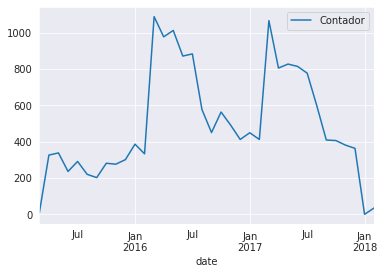

In [ ]:
auxFalse.plot(x='date', y='Contador')

En este caso podemos observar otras tres grandes zonas de interés, Marzo de 2016, Noviembre de 2016 y  Marzo de 2017.

En este caso, y siguiendo el orden antes mencionado, los eventos son: las primarias de US, en las que Trump tuvo que pelear bastante por la candidatura, las propias elecciones a la presidencia y ,finalmente, cuando sucedieron las anteriormente mencionadas marchas por el proceso de sustitución.



---


### Observación



Es muy notable el fortísimo aumento en el número de noticias en el verano de 2017 para las noticias verdaderas, y aunque esto podría ser por los eventos políticos comentados, habría que considerar que la recoleccion de datos, que en este caso es de terceros, haya influido en el repunte de noticias y por tanto la conclusión no sea del todo acertada.

Pasa algo similar con las noticias falsas, tenemos muy pocas noticias tanto al inicio como al final del gráfico, y la consistencia en el número de noticias total no es consistente, lo cual no tiene que ser malo de por sí, pero llama la atención y tenemos que volver a mencionar que la obtención de las noticias y la confeccion de estos dataset nos es desconocida, por lo que pueden enrarecer las conclusiones finales.


---



## Estudio con las letras mayúsculas

En varios estudios (*) se han comentado como el uso de las letras mayúsculas se utiliza de forma indiscriminada para la creación y redaccion de noticias falsas. Es por ello que un estudio de estas letras podría ser relevante para saber si es un buen indicador y poder clasificar de una manera mas eficiente los bulos.



* Reddy, H., Raj, N., Gala, M., & Basava, A. (2020). Text-mining-based fake news detection using ensemble methods. International Journal of Automation and Computing, 17(2), 210-221.
*Hardalov, M., Koychev, I., & Nakov, P. (2016, September). In search of credible news. In International conference on Artificial intelligence: methodology, systems, and applications (pp. 172-180). Springer, Cham.


In [ ]:
true ['Mayusculas'] = true ['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
false['Mayusculas'] = false['text'].apply(lambda x: sum(1 for c in x if c.isupper()))

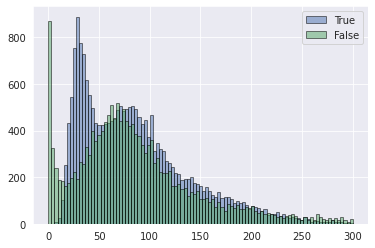

In [ ]:
plt.style.use('seaborn-deep')
bins = np.linspace(0, 300, 100)

pyplot.hist(true['Mayusculas'] ,bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(false['Mayusculas'],bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.legend(loc='upper right')
pyplot.show()

En el gráfico anterior se aprecia que el uso de las mayúsculas es más frecuente en los cuerpos de las noticias falsas que en el de las reales. Aunque las métricas se superponenno podemos decir que sea un indicador muy fiable.

Comprobemos si en los títulos de las noticias hay algún cambio mas notable.

In [ ]:
true ['Mayusculas'] = true ['title'].apply(lambda x: sum(1 for c in x if c.isupper()))
false['Mayusculas'] = false['title'].apply(lambda x: sum(1 for c in x if c.isupper()))

In [ ]:
noticias['mayusculas'] = noticias ['title'].apply(lambda x: sum(1 for c in x if c.isupper()))
noticias.head(1)

,title,text,subject,date,category,mayusculas
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4


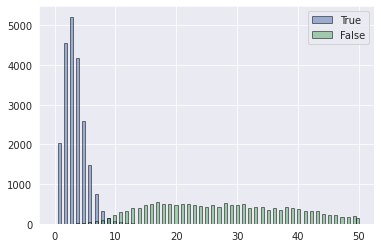

In [ ]:
plt.style.use('seaborn-deep')
bins = np.linspace(0, 50, 100)

pyplot.hist(true['Mayusculas'] ,bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(false['Mayusculas'],bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.legend(loc='upper right')
pyplot.show()

Ahora si podemos ver como esta métrica, aplicada a los títulos, si es relevante. La gran mayoria de las noticias falsas utiliza más de 10 letras en mayúsculas en sus títulos. 

## Estudio con las clases


---


Para este estudio tenemos que hacer mencion a que las clasificaciones de las noticias las han hecho terceros, y como tal no podemos confirmar cien por cien si la diferencia entre una clasificacion y otra es muy notoria, por ejemplo en el caso de una noticia politica y otra que solo se clasifica como noticia politica la pregunta que nos hacemos es ¿Cuál es el sesgo de clasificación?

Aun así creo que podemos extraer alguna que otra conclusión interesante.


---



Si estudiamos la clasificacion de las noticias reales vemos que solo se centran en dos temas: noticias de corte político y noticias de corte internacional.

[Text(0, 0, 'politicsNews'), Text(0, 0, 'worldnews')]

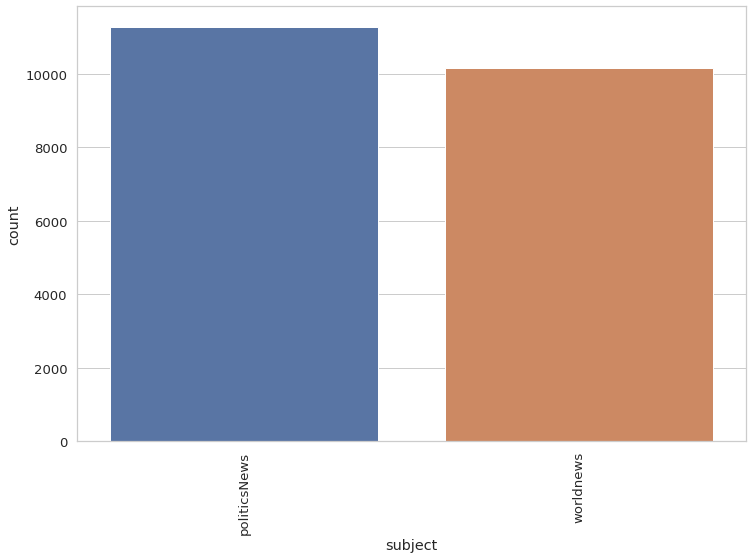

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject",   data = true)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Por el contrario podemos ver que las noticias falsas cubren un espectro de noticias mas amplio. Pero no hay ninguna clasificada como noticia de corte internacional.

[Text(0, 0, 'politics'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'News'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

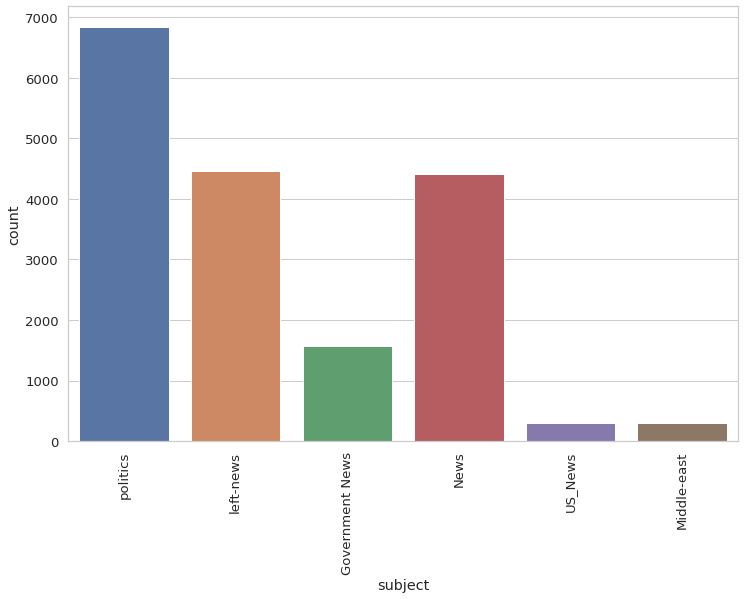

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject",  data = false)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

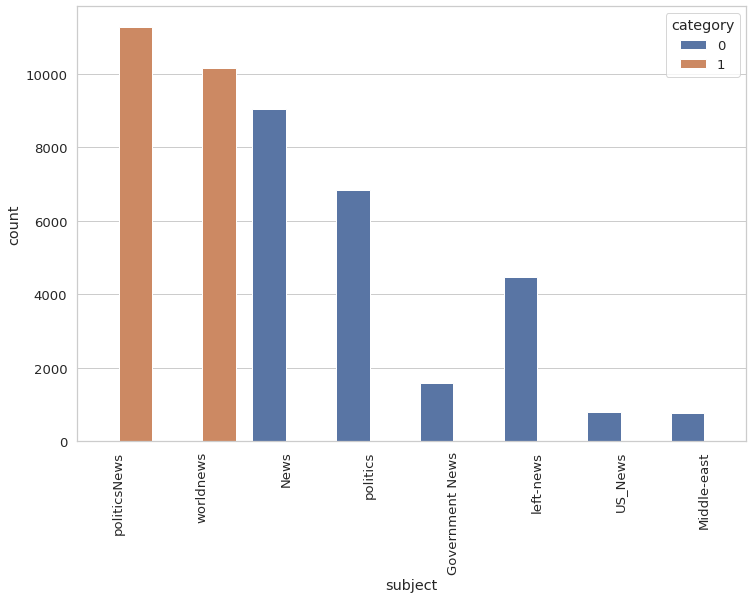

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = noticias)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Finalmente, y con una comparativa final, podemos observar en este grafico que las noticias falsas se centran en temas de relevancia local/nacional, aunque en este caso esto podría confundirse ya que el pais al que mas referencia se hace es a Estados Unidos y tenemos que volver a iterar en que la clasificación de estas las han realizados terceros

## Análisis de sentimientos


---
Para realizar el análisis de sentimientos es necesario haber tratado previamente el texto, pero por motivos de consistencia en la lectura del trabajo trabajaremos con los datos tratados antes de hablar sobre el propio tratamiento hecho a las noticias.


---




In [ ]:
# Noticias ya editadas, para ahorrar tiempo ejecutando
noticias = pd.read_csv('/content/drive/MyDrive/TFM/Datos/noticiasLimpias.csv', encoding = 'utf-8-sig') 

noticias = noticias.drop('Unnamed: 0', axis=1)
noticias['text'] = noticias['text'].astype(str)
noticias['category'] = noticias['category'].astype(int)

Descargamos el analizador de sentimientos, VADER*, de la libreria nltk para realizar este estudio.

*
Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def analisisDeSentimientos(x):
  analisisSen = list(sia.polarity_scores(x).values())
  return analisisSen[0],analisisSen[1],analisisSen[2],analisisSen[3]


noticias['neg'], noticias['neu'], noticias['pos'], noticias['compound'] = zip(*noticias['text'].map(analisisDeSentimientos))


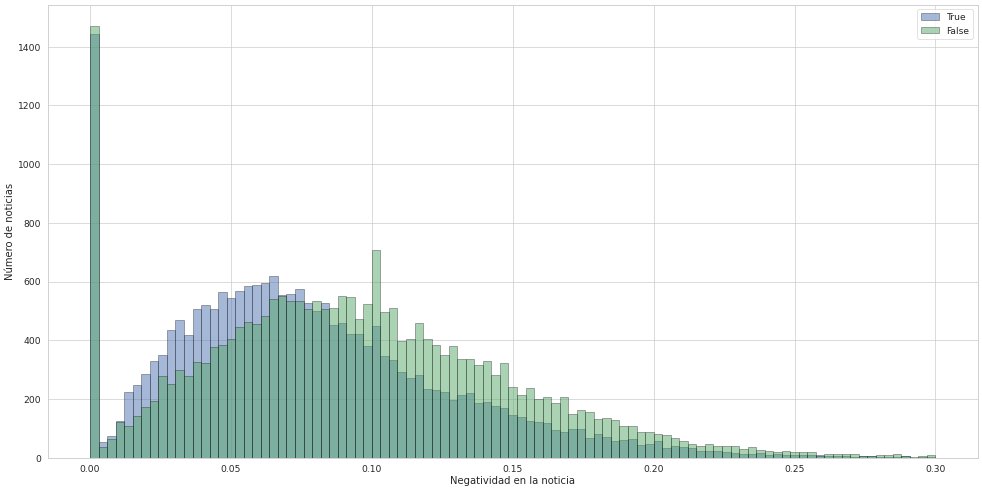

In [ ]:
plt.style.use('seaborn-deep')
bins = np.linspace(0, 0.3, 100)
figure(figsize=(24, 12), dpi=50)

pyplot.hist(noticias[noticias.category == 1]['neg'],bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(noticias[noticias.category == 0]['neg'],bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.legend(loc='upper right')
pyplot.xlabel('Negatividad en la noticia')
pyplot.ylabel('Número de noticias') 
pyplot.show()

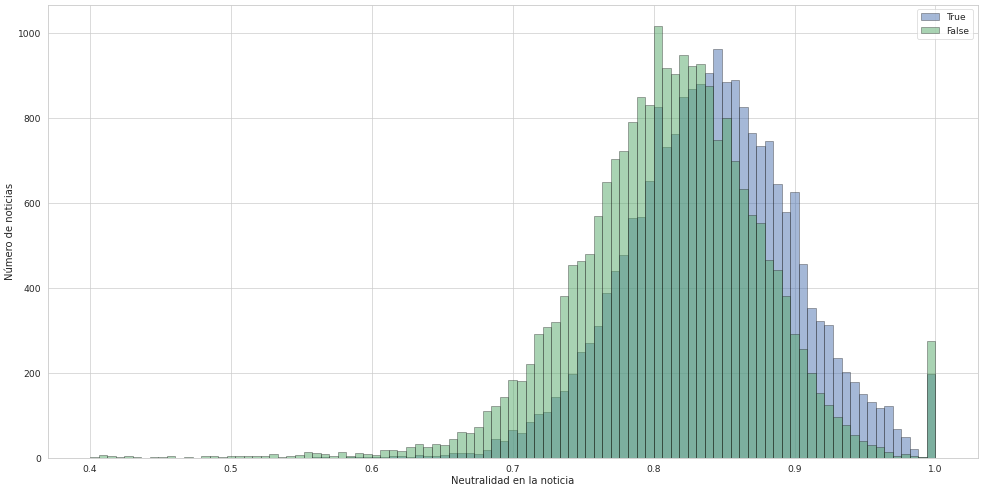

In [ ]:
plt.style.use('seaborn-deep')
bins = np.linspace(0.4, 1, 100)
figure(figsize=(24, 12), dpi=50)


pyplot.hist(noticias[noticias.category == 1]['neu'],bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(noticias[noticias.category == 0]['neu'],bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.legend(loc='upper right')
pyplot.xlabel('Neutralidad en la noticia')
pyplot.ylabel('Número de noticias') 
pyplot.show()

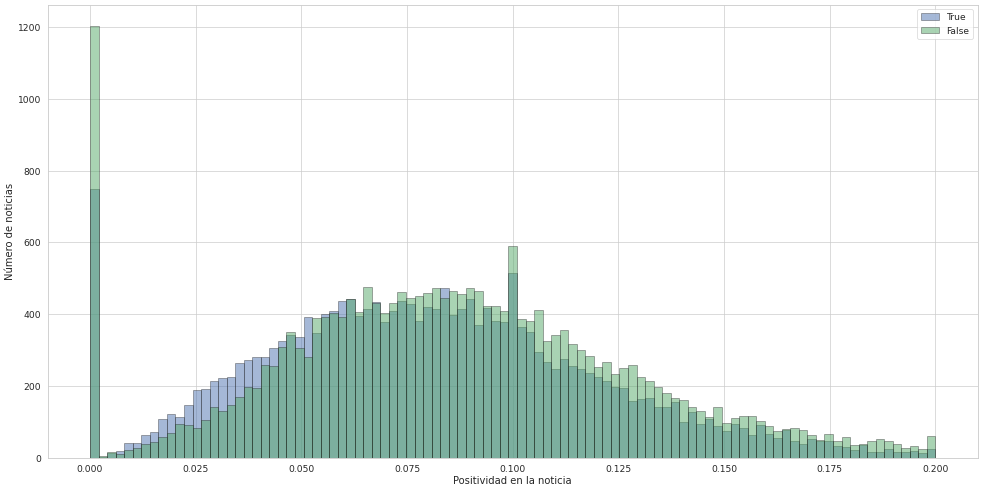

In [ ]:
plt.style.use('seaborn-deep')
bins = np.linspace(0, 0.2, 100)
figure(figsize=(24, 12), dpi=50)


pyplot.hist(noticias[noticias.category == 1]['pos'],bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(noticias[noticias.category == 0]['pos'],bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.xlabel('Positividad en la noticia')
pyplot.ylabel('Número de noticias') 
pyplot.legend(loc='upper right')
pyplot.show()

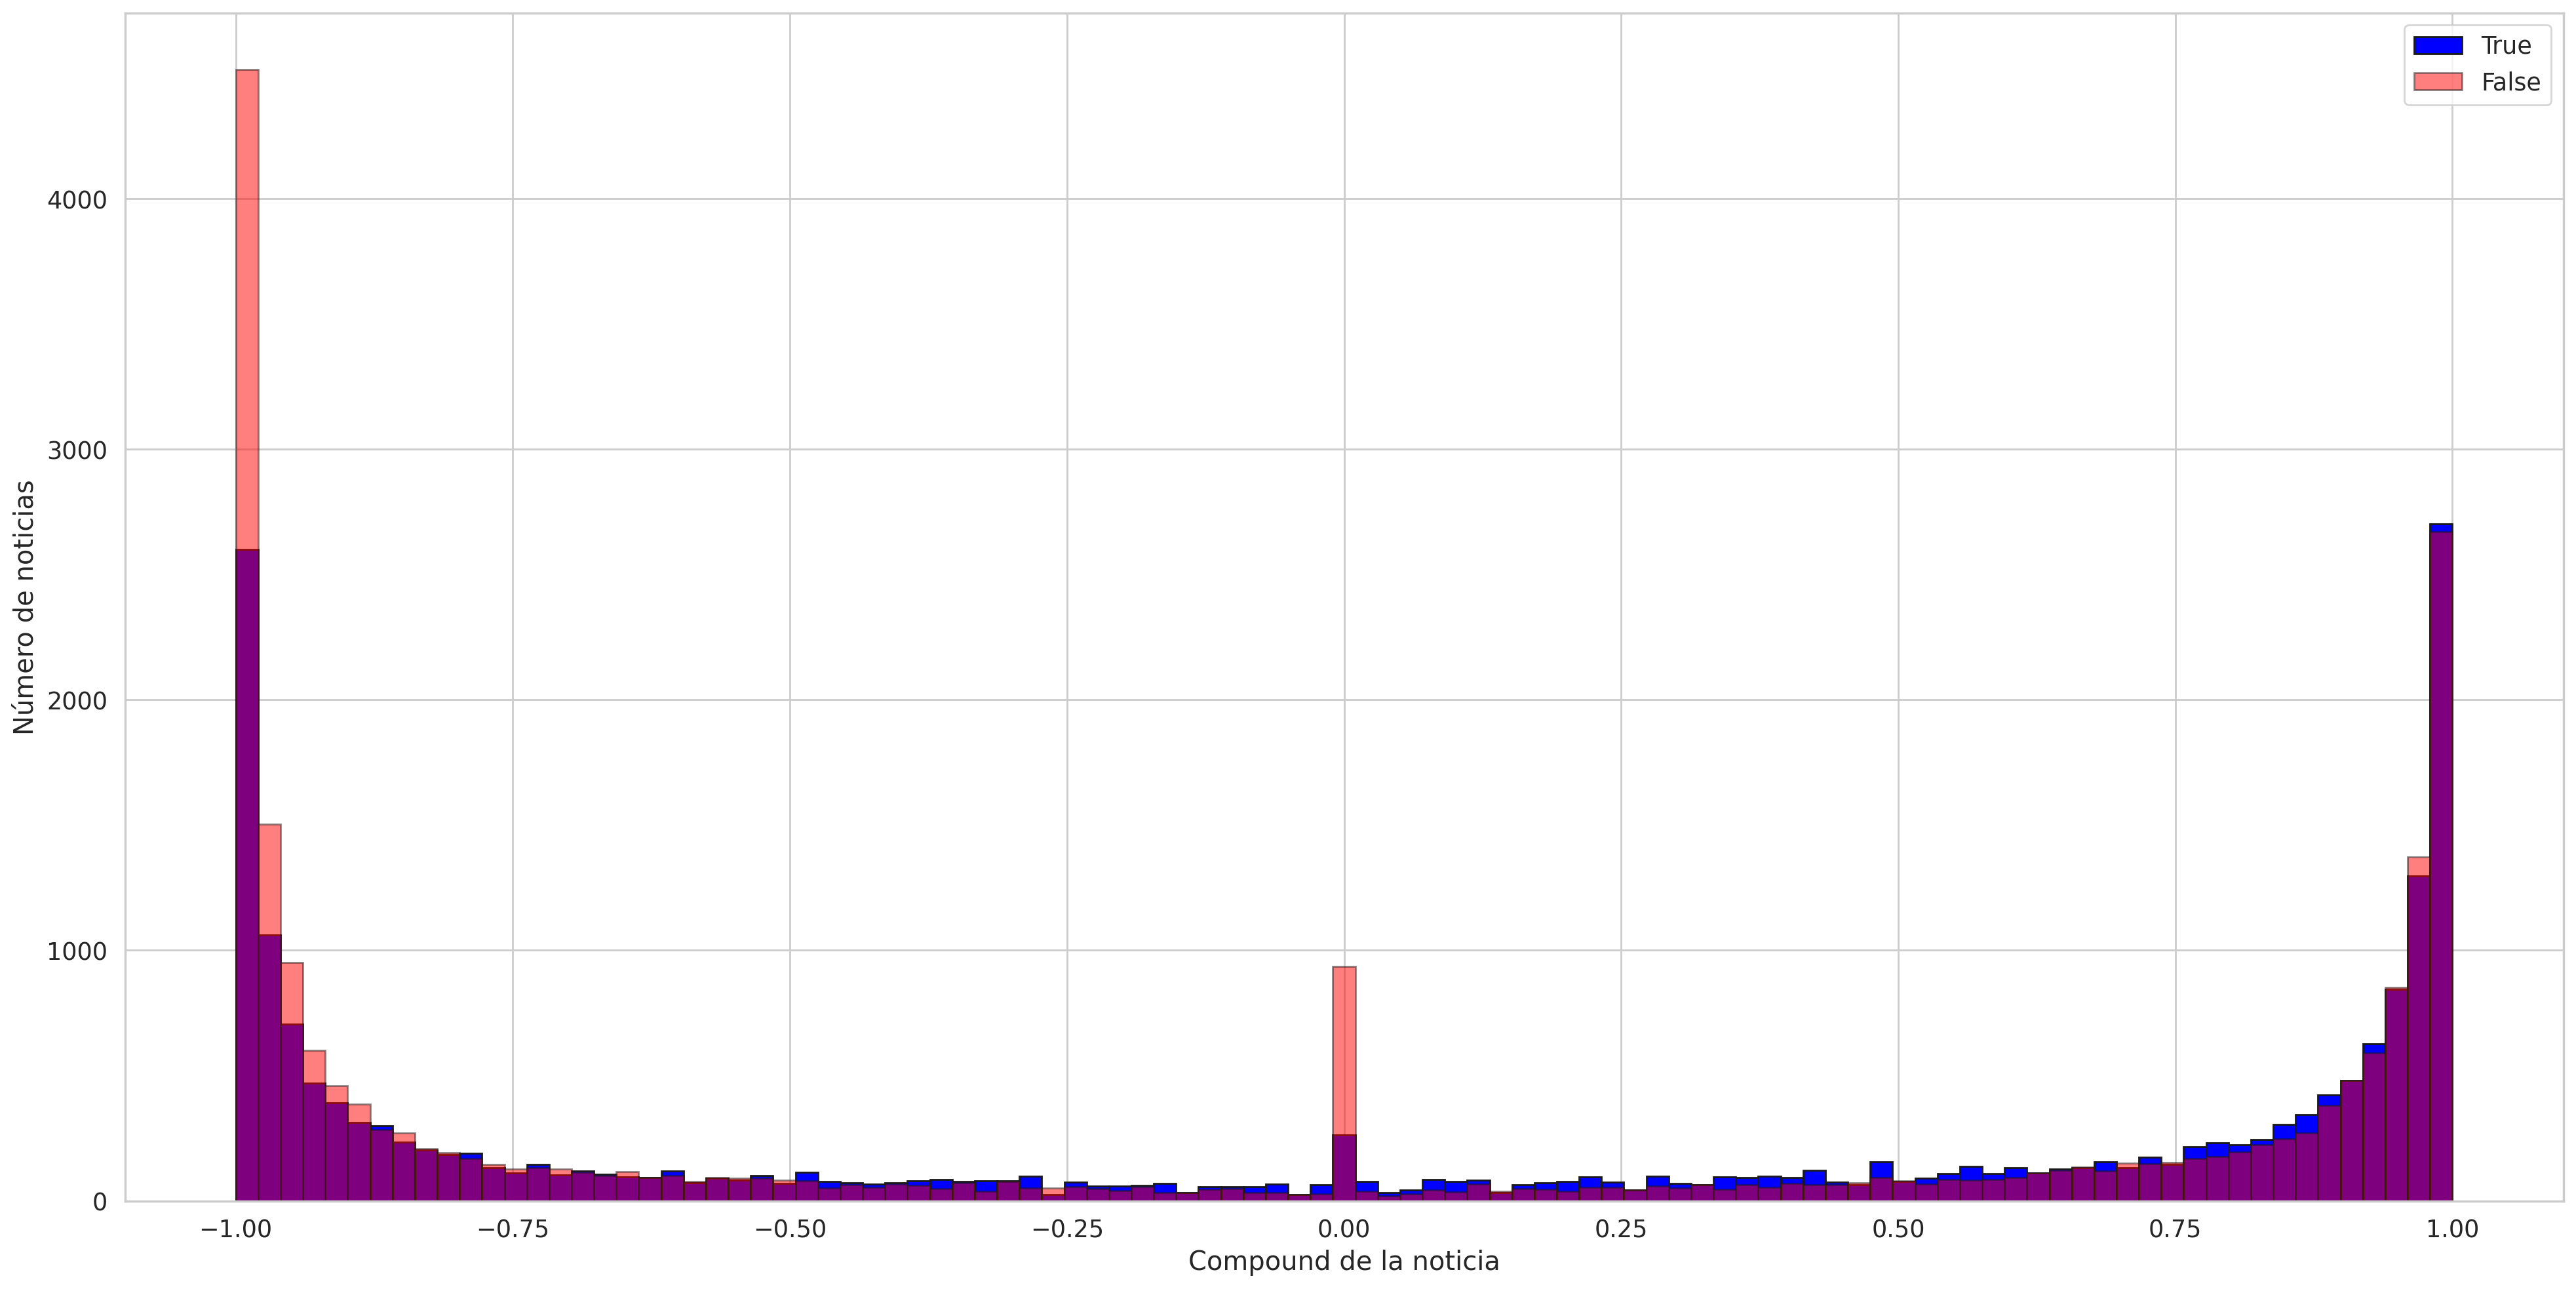

In [ ]:
plt.style.use('seaborn-deep')
bins = np.linspace(-1, 1, 100)
figure(figsize=(24, 12), dpi=200)

pyplot.hist(noticias[noticias.category == 1]['compound'],bins,  alpha=1, label='True', edgecolor= 'k', color='blue')
pyplot.hist(noticias[noticias.category == 0]['compound'],bins,  alpha=0.5, label='False',edgecolor= 'k', color='red')
pyplot.xlabel('Compound de la noticia')
pyplot.ylabel('Número de noticias') 
pyplot.legend(loc='upper right')
pyplot.show()

Tras estas gráficas podemos confirmar que las noticias falsas suelen tener una deriva mas emocional que las noticias reales. 

Destacando el caso del estudio de la negatividad, y en el del compound, en el cual apreciamos que las fake news suelen ser en su gran mayoria muy negativas y las noticias reales mantienen un "equilibrio".

## Nube de palabras


Realizaremos un análisis de la nube de palabras de nuestros textos para ver cuales eran los terminos mas relevantes de estos.

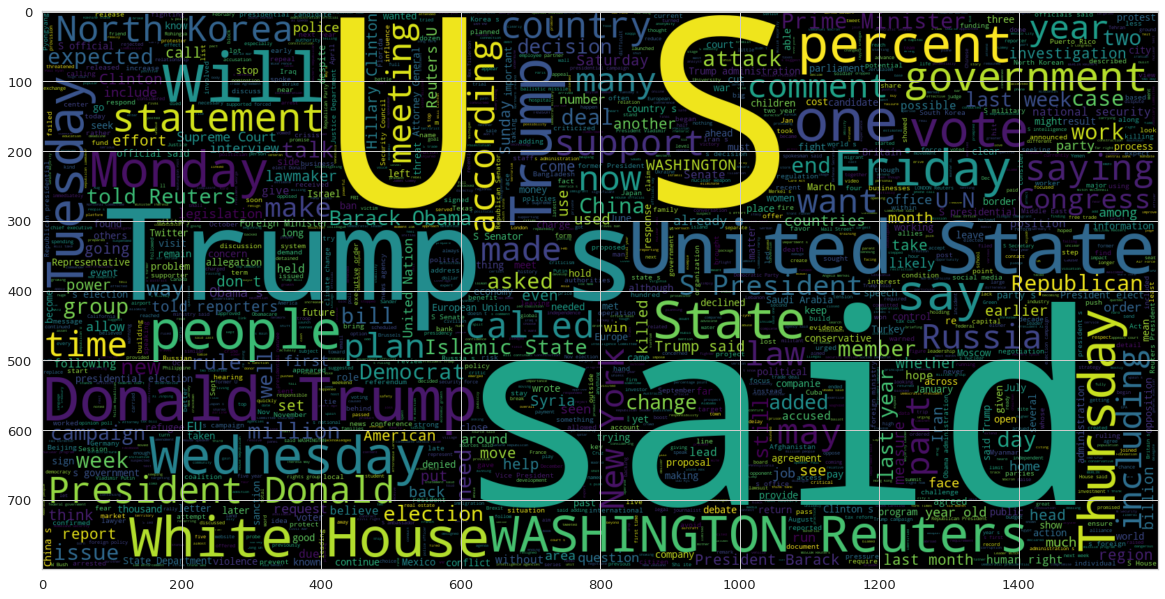

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(noticias[noticias.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

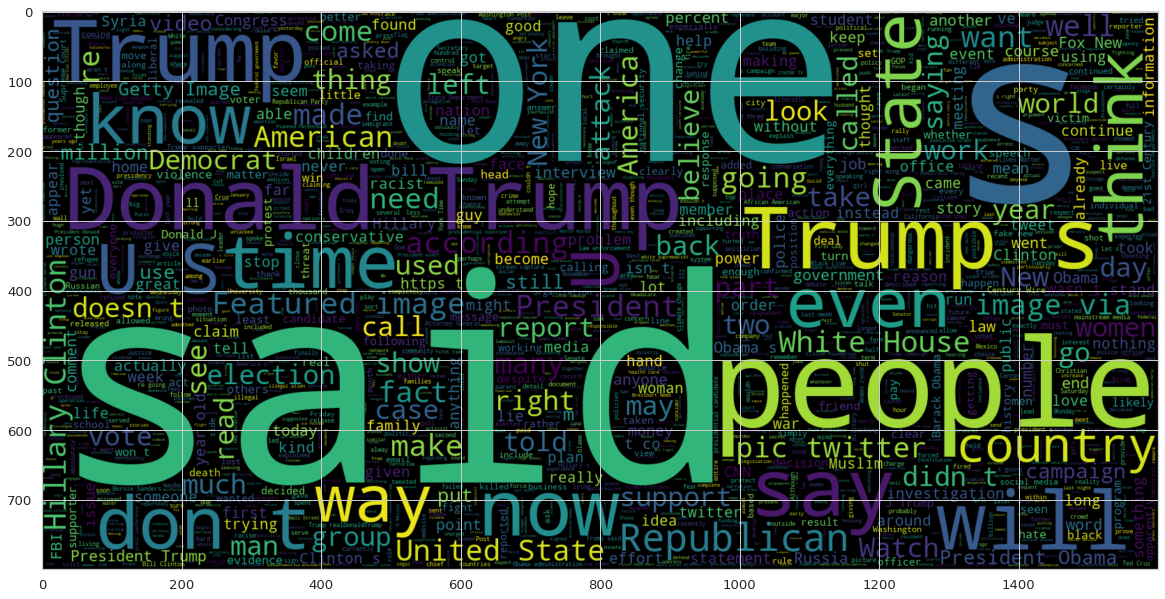

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(noticias[noticias.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

## Conteo de caracteres

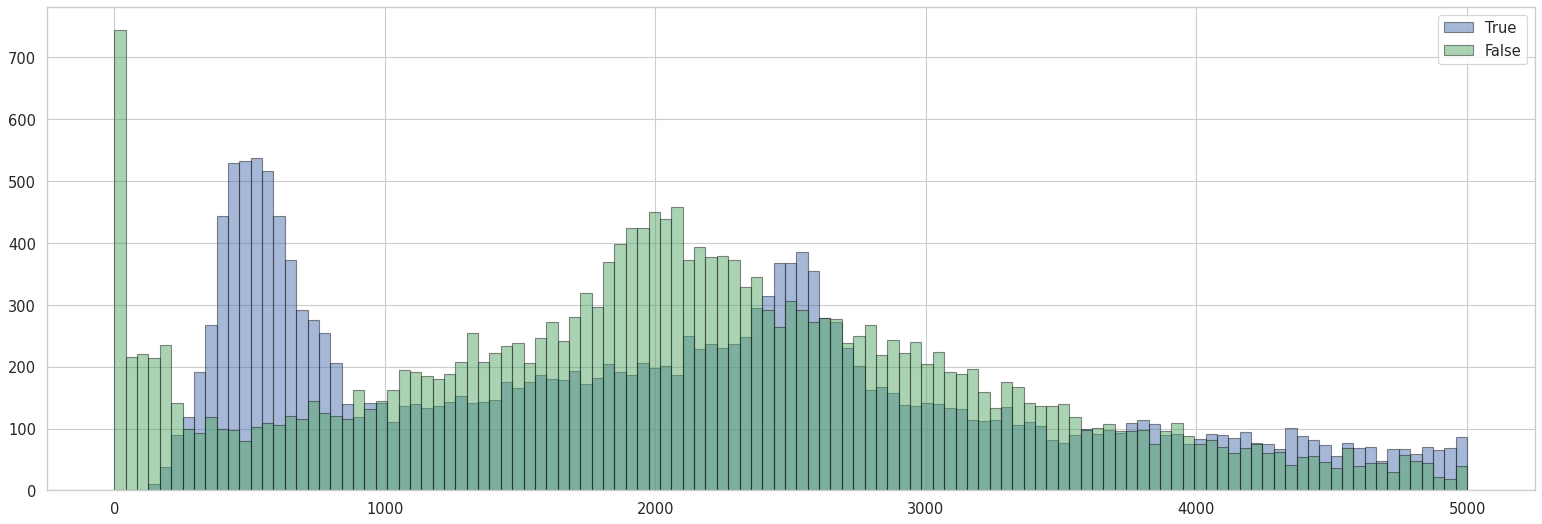

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(24,8), dpi=80)
plt.style.use('seaborn-deep')
bins = np.linspace(0, 5000, 120)

text_len1=noticias[noticias['category']==1]['text'].str.len()
text_len2=noticias[noticias['category']==0]['text'].str.len()


pyplot.hist(text_len1,bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(text_len2,bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.legend(loc='upper right')
pyplot.show( )

Del conteo de caracteres podemos sacar la conclusión de que las noticias reales suelen utilizar menos en la redaccion de sus noticias. Aunque si el texto es muy extenso la diferencia entre ambas categorias se difumina.

## Numero de palabras por noticia

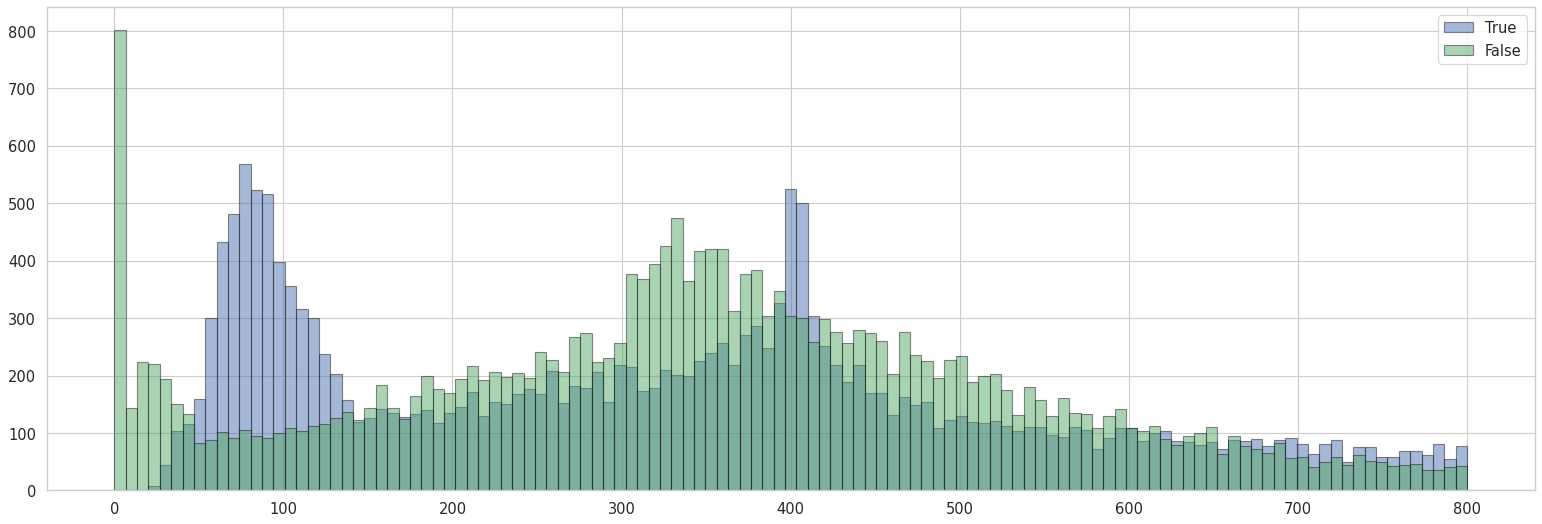

In [ ]:

figure(figsize=(24,8), dpi=80)
plt.style.use('seaborn-deep')
bins = np.linspace(0, 800, 120)

text_len1=noticias[noticias['category']==1]['text'].str.split().map(lambda x: len(x))
text_len2=noticias[noticias['category']==0]['text'].str.split().map(lambda x: len(x))


pyplot.hist(text_len1,bins,  alpha=0.5, label='True', edgecolor= 'k')
pyplot.hist(text_len2,bins,  alpha=0.5, label='False',edgecolor= 'k')
pyplot.legend(loc='upper right')
pyplot.show( )

Podemos afirmar que, en general, las noticias falsas utilizan el doble de palabras que las reales, lo cual podría ser un buen indicador para detectarlas. Aunque si el texto es de una extensión considerable el indicador no es valido.

## Análisis de n-gramas

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(noticias.text)
corpus[:15]

['WASHINGTON',
 '(Reuters)',
 '-',
 'The',
 'head',
 'of',
 'a',
 'conservative',
 'Republican',
 'faction',
 'in',
 'the',
 'U.S.',
 'Congress,',
 'who']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'the': 905825,
 'to': 529815,
 'of': 437532,
 'and': 392470,
 'a': 390084,
 'in': 322378,
 'that': 220928,
 'on': 181758,
 's': 172259,
 'for': 166256}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

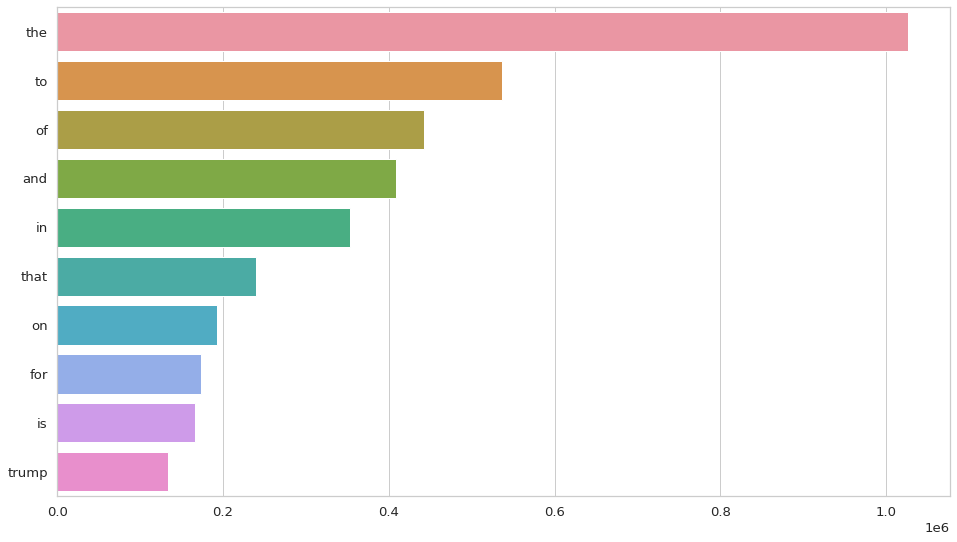

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(noticias.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

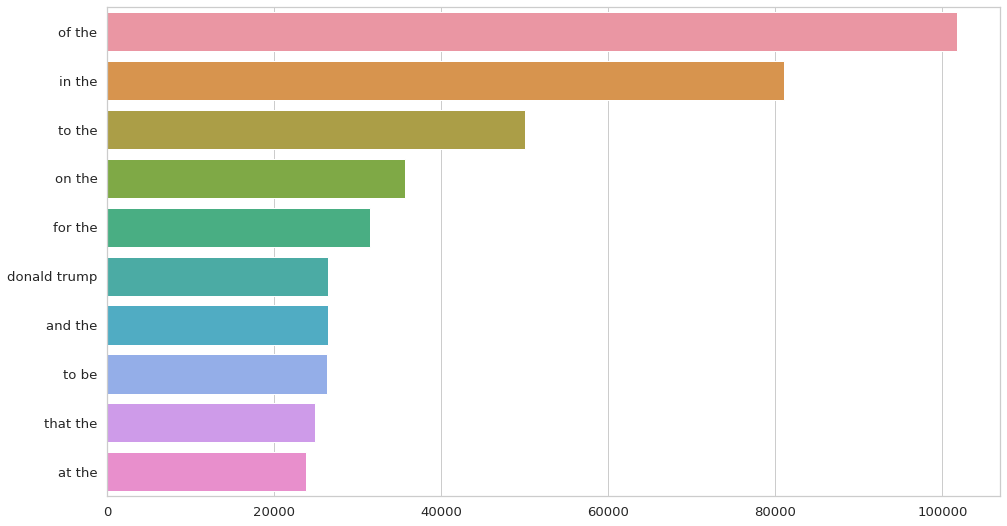

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(noticias.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

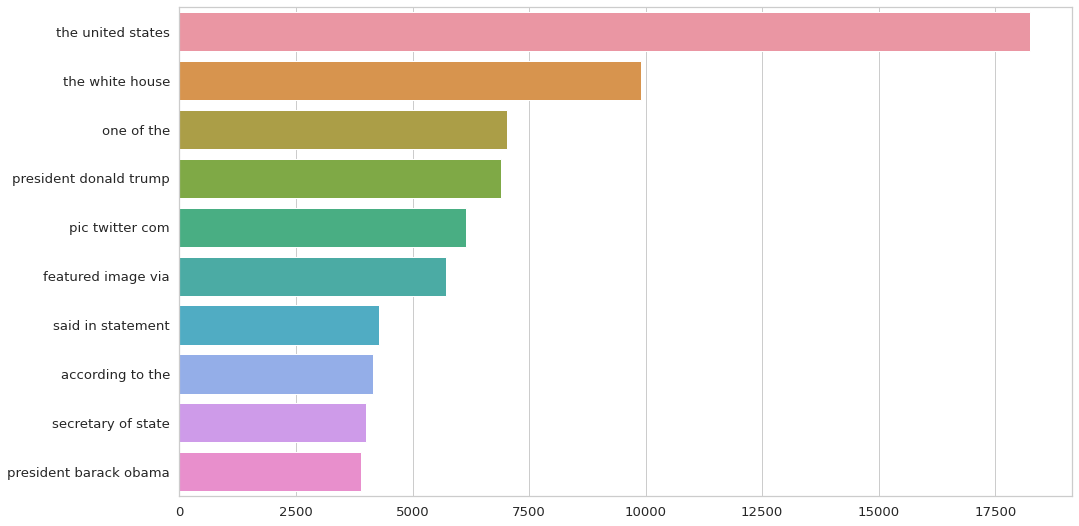

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(noticias.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [ ]:
noticias1 = noticias

# Tratamiento de los datos

Ya hemos finalizado con el estudio de los datos. Ahora pasaremos al tratamiento de los datos para su posterior uso en el entrenamiento y evaluación de la red.

In [ ]:
# Noticias ya editadas y limpias, para ahorrar tiempo ejecutando
noticias = pd.read_csv('/content/drive/MyDrive/TFM/Datos/noticiasLimpias.csv', encoding = 'utf-8-sig') 

noticias = noticias.drop('Unnamed: 0', axis=1)
noticias['text'] = noticias['text'].astype(str)
noticias['category'] = noticias['category'].astype(int)

noticias.head(2)

,text,category,neg,neu,pos,compound
0,head conservative Republican faction U.S. Con...,1,0.071,0.809,0.120,0.9747
1,Transgender people allowed first time enlist ...,1,0.088,0.764,0.149,0.9576


In [ ]:
#Tenemos que juntar el titulo y el cuerpo de la noticia para poder procesar todo el texto correctamente

noticias['text'] = noticias['text'] + " " + noticias['title']
del noticias['title']
del noticias['subject']
del noticias['date']

In [ ]:
noticias.head(10)

,text,category,mayusculas,neg,neu,pos,compound
0,WASHINGTON (Reuters) - The head of a conservat...,1,4,0.049,0.862,0.089,0.9857
1,WASHINGTON (Reuters) - Transgender people will...,1,4,0.085,0.824,0.092,-0.0547
2,WASHINGTON (Reuters) - The special counsel inv...,1,7,0.050,0.906,0.044,-0.6808
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,8,0.067,0.874,0.059,-0.2201
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,4,0.045,0.893,0.061,0.5896
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",1,3,0.057,0.840,0.103,0.9794
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",1,5,0.073,0.813,0.114,0.9814
7,The following statements were posted to the ve...,1,6,0.098,0.770,0.132,0.7254
8,The following statements were posted to the ve...,1,5,0.016,0.886,0.099,0.8201
9,WASHINGTON (Reuters) - Alabama Secretary of St...,1,6,0.034,0.870,0.096,0.4767


In [ ]:
noticias.text.count()

44898

A la hora de revisar los datos he encontrado tuits que parecen haber sidos extraidos con la API de Twitter la cual genera un texto en todas las noticias que puede enrarecer el entrenamiento de la red, por lo que hemos decidido elimnar dichos textos.

In [ ]:
#Eliminacion de los tweets
noticias = noticias[noticias["text"].str.contains("The following statements") == False]

In [ ]:
noticias.text.count()

44803

In [ ]:
#Eliminación de las stopswords, proceso estandar con este tipo de datos y objetivos
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
noticias

,text,category,mayusculas,neg,neu,pos,compound
0,WASHINGTON (Reuters) - The head of a conservat...,1,4,0.049,0.862,0.089,0.9857
1,WASHINGTON (Reuters) - Transgender people will...,1,4,0.085,0.824,0.092,-0.0547
2,WASHINGTON (Reuters) - The special counsel inv...,1,7,0.050,0.906,0.044,-0.6808
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,8,0.067,0.874,0.059,-0.2201
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,4,0.045,0.893,0.061,0.5896
...,...,...,...,...,...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0,13,0.102,0.787,0.111,0.7675
23477,21st Century Wire says It s a familiar theme. ...,0,15,0.054,0.853,0.093,0.9429
23478,Patrick Henningsen 21st Century WireRemember ...,0,12,0.130,0.767,0.103,-0.9994
23479,21st Century Wire says Al Jazeera America will...,0,9,0.081,0.834,0.085,0.4589


###Observación

Si echamos un rápido vistazo a las noticias, una de las cosas de las que podemos darnos cuenta primero es que la mayoría de noticias catalogadas como true son de la agencia de información Reuters, es por ello que la mayoría de las noticias fueran de corte internacional.

Pero esto supone un problema de cara a nuestro clasificador, ya que introduce un sesgo muy notable. Por ejemplo, si nosotros quisiéramos escribir y difundir un bulo, no nos importaría mentir y por ende introducir una fuente falsa, y si además sabemos que las noticias reales incluyen el nombre de un sitio y (REUTERS) a continuación, simplemente con poner eso en el texto podríamos engañar fácilmente a nuestro clasificador o aumentar drásticamente las posibilidades de que surja un falso positivo.

In [ ]:
#Funciones para limpiar los datos

#Parseamos las noticias cuyo texto este en formato html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Para eliminar las fuentes 
def remove_reuters(text): 
  return re.sub(r'.*(Reuters).', '',   text)
     

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)


#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text = remove_reuters(text)
    return text


In [ ]:
#Aplicacion de dichas funciones a los textos
noticias['text']=noticias['text'].apply(denoise_text)
#noticias['neg'], noticias['neu'], noticias['pos'], noticias['compound'] = zip(*noticias['text'].map(analisisDeSentimientos))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Una vez tratado todo el texto lo guardamos en un csv para no perder tiempo en ejecutar todas las operaciones otra vez
#noticias.to_csv('/content/drive/MyDrive/TFM/Datos/noticiasLimpias_SENT_MAYUS.csv', encoding = 'utf-8-sig') 

# Creación de modelos y mergeado

Durante el desarrollo de este código se han realizado varios análisis, de los cuales hemos extraido y derivado, conclusiones muy interesantes que se podrían añadir al entrenamiento de la red y no solo utilizar el texto como datos de entrenamiento. 

In [ ]:
# Noticias ya editadas, para ahorrar tiempo ejecutando
noticias = pd.read_csv('/content/drive/MyDrive/TFM/Datos/noticiasLimpias_SENT_MAYUS.csv', encoding = 'utf-8-sig') 

noticias = noticias.drop('Unnamed: 0', axis=1)
noticias['text'] = noticias['text'].astype(str)
noticias['category'] = noticias['category'].astype(int)
noticias['mayusculas'] = noticias['mayusculas'].astype(int)

noticias['neg'] = noticias['neg'].astype(float)
noticias['neu'] = noticias['neu'].astype(float)
noticias['pos'] = noticias['pos'].astype(float)
noticias['compound'] = noticias['compound'].astype(float)


noticias.head()

,text,category,mayusculas,neg,neu,pos,compound
0,head conservative Republican faction U.S. Con...,1,4,0.049,0.862,0.089,0.9857
1,Transgender people allowed first time enlist ...,1,4,0.085,0.824,0.092,-0.0547
2,special counsel investigation links Russia Pr...,1,7,0.050,0.906,0.044,-0.6808
3,comment. Mueller’s office declined comment. Tr...,1,8,0.067,0.874,0.059,-0.2201
4,President Donald Trump called U.S. Postal Ser...,1,4,0.045,0.893,0.061,0.5896


In [ ]:
x = noticias[['text','mayusculas', 'neg','neu','pos','compound']]
y = noticias['category']

# Partir train para hacer validación
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0) 


#Valor maximo en los vectores: cuantos tokens distintos puede haber / cuantas palabras distintas hay
max_features = 10000

# Numero de componentes en los vectores
maxlen = 200

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


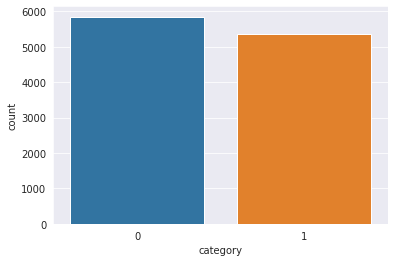

In [ ]:
# Nos aseguramos que la distribucion de noticias reales vs falsas sea similar 
sns.set_style("darkgrid")
sns.countplot(y_test)

In [ ]:
# Separamos el dataset para las distintas entradas de la red en texto y sentimientos
x_train_texto = x_train['text']
x_train_senti = x_train[['neg','neu','pos','compound']]
x_train_mayus = x_train['mayusculas']

x_test_texto = x_test ['text']
x_test_senti = x_test [['neg','neu','pos','compound']]
x_test_mayus = x_test ['mayusculas']

In [ ]:
# Creación del tokenizador y tokenizado de los textos de las noticias

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train_texto)
tokenized_train = tokenizer.texts_to_sequences(x_train_texto)
x_train_texto =  pad_sequences(tokenized_train, maxlen=maxlen)



tokenized_test = tokenizer.texts_to_sequences(x_test_texto)
x_test_texto =  pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/TFM/Datos/glove.twitter.27B.100d.txt'

# Con esta funcion obtenemos los coeficinetes de la 
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
    
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# Recrea exactamente el mismo modelo solo desde el archivo
# merged = keras.models.load_model('/content/drive/MyDrive/TFM/Modelos/modeloV1.h5')

In [ ]:
# Model LSTM para los textos
input_lstm = Input(shape=(200,), name="Input_a")

lstm_x1 = Embedding(max_features, 
                    output_dim=embed_size, #
                    weights=[embedding_matrix], # Los pesos con los que crear el vector denso
                    input_length=maxlen, 
                    trainable=False)      (input_lstm)

lstm_x2 = LSTM(units=200 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)(lstm_x1)
lstm_x3 = LSTM(units=150  , recurrent_dropout = 0.1 , dropout = 0.1)(lstm_x2)
lstm_x4 = Dense(100, activation = 'sigmoid')(lstm_x3)
lstm_x5 = Dense(50, activation='sigmoid')(lstm_x4)




 

# Model Dense para los sentimientos
input_sent = Input(shape=(4,), name="Input_b")
sent_x1 = Dense(4, activation="relu")(input_sent)
sent_x2 = Dense(4, activation="relu")(sent_x1)
sent_x3 = Dense(4)(sent_x2)


# Capa para el conteo de las mayúsculas
input_mayu = Input(shape=(1,), name="Input_c")



#Concatenamos el modelo
a_b = concatenate([lstm_x5,sent_x3,input_mayu],name="concatenated_layer")
densa_1 = Dense(30, activation = "sigmoid" )(a_b)
densa_2 = Dense(15, activation = "sigmoid" )(densa_1)
densa_3 = Dense( 5, activation = "sigmoid" )(densa_2)

# Continuamos con la red nueronal
output_layer = Dense(1, activation = "sigmoid", name = "output_layer")(densa_3)

# Definimos el modelo
merged = Model(inputs=[(input_lstm,input_sent,input_mayu)],outputs=[output_layer], name = "merged_model")

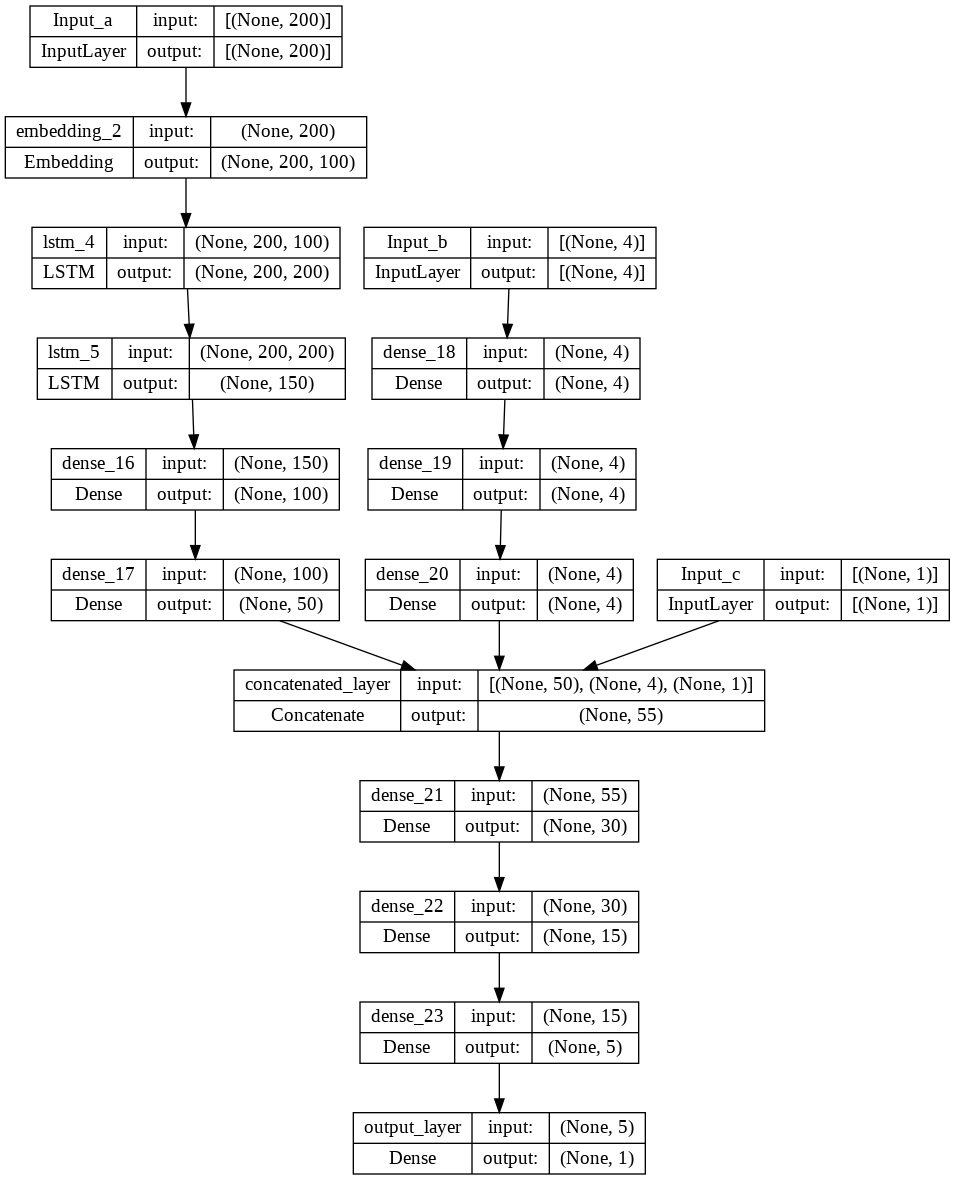

In [ ]:
# Presentacion del modelo
keras.utils.plot_model(merged, show_shapes=True)

In [ ]:
# parameters
PARAMS = {'epoch_nr': 30,
          'batch_size': 256,
          'lr': 0.01,
          'loss':'binary_crossentropy'
          }


##################################################

merged.compile(optimizer=keras.optimizers.Adam(learning_rate = PARAMS['lr']), 
               loss=PARAMS['loss'], 
               metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy')

In [ ]:
import neptune.new as neptune
from neptune.new.integrations.tensorflow_keras import NeptuneCallback

run = neptune.init(
    project="svaldimor/ProjectoTFM",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NmQ4ODc2MC1jZDNhLTQ5NGMtYTlmOC1jZTRlNTcwZjEwODEifQ==",
)



https://app.neptune.ai/svaldimor/ProjectoTFM/e/PROJ-6
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [ ]:



merged.fit([x_train_texto, x_train_senti, x_train_mayus], 
           y_train,
           epochs = PARAMS['epoch_nr'], 
           batch_size=PARAMS['batch_size'],
           callbacks = [learning_rate_reduction,NeptuneCallback(run=run)])



Epoch 1/30
132/132 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9809

132/132 [==============================] - 178s 1s/step - loss: 0.0700 - accuracy: 0.9809 - lr: 0.0100
Epoch 2/30
132/132 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9816

132/132 [==============================] - 173s 1s/step - loss: 0.0581 - accuracy: 0.9816 - lr: 0.0100
Epoch 3/30
132/132 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9817

132/132 [==============================] - 172s 1s/step - loss: 0.0562 - accuracy: 0.9817 - lr: 0.0100
Epoch 4/30
132/132 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9830

132/132 [==============================] - 173s 1s/step - loss: 0.0547 - accuracy: 0.9830 - lr: 0.0100
Epoch 5/30
132/132 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9822

132/132 [==============================] - 172s 1s/step - loss: 0.0541 - accuracy: 0.9822 - lr: 0.0100
Epoch 6/30
132/132 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9827

132/132 [==============================] - 172s 1s/step - loss: 0.0541 - accuracy: 0.9827 - lr: 0.0100
Epoch 7/30
132/132 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9824

132/132 [==============================] - 172s 1s/step - loss: 0.0536 - accuracy: 0.9824 - lr: 0.0100
Epoch 8/30
132/132 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9827

132/132 [==============================] - 171s 1s/step - loss: 0.0553 - accuracy: 0.9827 - lr: 0.0100
Epoch 9/30
132/132 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9821

132/132 [==============================] - 172s 1s/step - loss: 0.0536 - accuracy: 0.9821 - lr: 0.0100
Epoch 10/30
132/132 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9826

132/132 [==============================] - 171s 1s/step - loss: 0.0538 - accuracy: 0.9826 - lr: 0.0100
Epoch 11/30
132/132 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9830

132/132 [==============================] - 172s 1s/step - loss: 0.0532 - accuracy: 0.9830 - lr: 0.0100
Epoch 12/30
132/132 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9825

132/132 [==============================] - 174s 1s/step - loss: 0.0532 - accuracy: 0.9825 - lr: 0.0100
Epoch 13/30
132/132 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9825

132/132 [==============================] - 174s 1s/step - loss: 0.0540 - accuracy: 0.9825 - lr: 0.0100
Epoch 14/30
132/132 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9830

132/132 [==============================] - 172s 1s/step - loss: 0.0532 - accuracy: 0.9830 - lr: 0.0100
Epoch 15/30
132/132 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9819

132/132 [==============================] - 173s 1s/step - loss: 0.0534 - accuracy: 0.9819 - lr: 0.0100
Epoch 16/30
132/132 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9830

132/132 [==============================] - 173s 1s/step - loss: 0.0530 - accuracy: 0.9830 - lr: 0.0100
Epoch 17/30
132/132 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9829

132/132 [==============================] - 172s 1s/step - loss: 0.0530 - accuracy: 0.9829 - lr: 0.0100
Epoch 18/30
132/132 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9827

132/132 [==============================] - 172s 1s/step - loss: 0.0538 - accuracy: 0.9827 - lr: 0.0100
Epoch 19/30
132/132 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9831

132/132 [==============================] - 172s 1s/step - loss: 0.0521 - accuracy: 0.9831 - lr: 0.0100
Epoch 20/30
132/132 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9830

132/132 [==============================] - 173s 1s/step - loss: 0.0533 - accuracy: 0.9830 - lr: 0.0100
Epoch 21/30
132/132 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9825

132/132 [==============================] - 172s 1s/step - loss: 0.0528 - accuracy: 0.9825 - lr: 0.0100
Epoch 22/30
132/132 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9827

132/132 [==============================] - 172s 1s/step - loss: 0.0527 - accuracy: 0.9827 - lr: 0.0100
Epoch 23/30
132/132 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9832

132/132 [==============================] - 172s 1s/step - loss: 0.0530 - accuracy: 0.9832 - lr: 0.0100
Epoch 24/30
132/132 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9826

132/132 [==============================] - 172s 1s/step - loss: 0.0538 - accuracy: 0.9826 - lr: 0.0100
Epoch 25/30
132/132 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9831

132/132 [==============================] - 172s 1s/step - loss: 0.0527 - accuracy: 0.9831 - lr: 0.0100
Epoch 26/30
132/132 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9831

132/132 [==============================] - 171s 1s/step - loss: 0.0525 - accuracy: 0.9831 - lr: 0.0100
Epoch 27/30
132/132 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9829

132/132 [==============================] - 173s 1s/step - loss: 0.0524 - accuracy: 0.9829 - lr: 0.0100
Epoch 28/30
132/132 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9832

132/132 [==============================] - 173s 1s/step - loss: 0.0526 - accuracy: 0.9832 - lr: 0.0100
Epoch 29/30
132/132 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9827

132/132 [==============================] - 173s 1s/step - loss: 0.0525 - accuracy: 0.9827 - lr: 0.0100
Epoch 30/30
132/132 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9834

132/132 [==============================] - 173s 1s/step - loss: 0.0527 - accuracy: 0.9834 - lr: 0.0100


In [ ]:
# Guardar el Modelo (OJO CON GUARDAR MODELOS INICIALIZADOS SIN ENTRENAR)
merged.save('/content/drive/MyDrive/TFM/Modelos/modeloV1.h5')


In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/svaldimor/ProjectoTFM/e/PROJ-6


# Conclusiones finales 

In [ ]:
#preds_prob = merged.predict([x_test_texto, x_test_senti,x_test_mayus])
#reds      = merged.predict_classes([x_test_texto, x_test_senti,x_test_mayus])


loss_metrics = merged.evaluate([x_test_texto, x_test_senti,x_test_mayus], y_test)
 

351/351 [==============================] - 51s 142ms/step - loss: 0.0544 - accuracy: 0.9832


In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

TypeError: ignored